In [26]:
from numpy.random import randn
import numpy as np
import pandas as pd
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D 

plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 10
%matplotlib inline

In [27]:
planes = pd.read_csv('data/planes.csv', low_memory=False)
flights = pd.read_csv('data/flights.csv', low_memory=False, usecols=['TAIL_NUMBER','ARRIVAL_DELAY'])
planes

,TAIL_NUMBER,YEAR MANUFACTURED,MANUFACTURER,MODEL,NO-ENG,NO-SEATS
0,N407AS,2012,BOEING,737-990ER,2,222
1,N171US,2001,AIRBUS INDUSTRIE,A321-211,2,199
2,N527AS,,BOEING,737-890,2,149
3,N3730B,2000,BOEING,737-832,2,189
4,N635NK,2014,AIRBUS,A320-232,2,200
...,...,...,...,...,...,...
3894,N7833A,2003,BOEING,737-79P,2,149
3895,N662NK,2015,AIRBUS,A321-231,2,379
3896,N8675A,2015,BOEING,737-8H4,2,140
3897,N850DN,,BOEING,737-932ER,2,222


In [28]:
merge = pd.merge(flights,planes,on='TAIL_NUMBER')

In [29]:
def display_mean_arrival_delay(source,groupby,mincount,title,sortby,color):
    df = pd.DataFrame(source[[groupby,'ARRIVAL_DELAY']].groupby([groupby]).agg(['mean', 'count']).reset_index())
    df.columns = df.columns.get_level_values(0)
    df.columns = [groupby,title,'COUNT']
    df = df.query('COUNT>'+mincount)
    df = df.sort_values(by=sortby)
    df = df.set_index(groupby)
    df.plot(kind='bar', figsize=(20, 10), title=title + ' by ' + groupby, y=title,color=color)

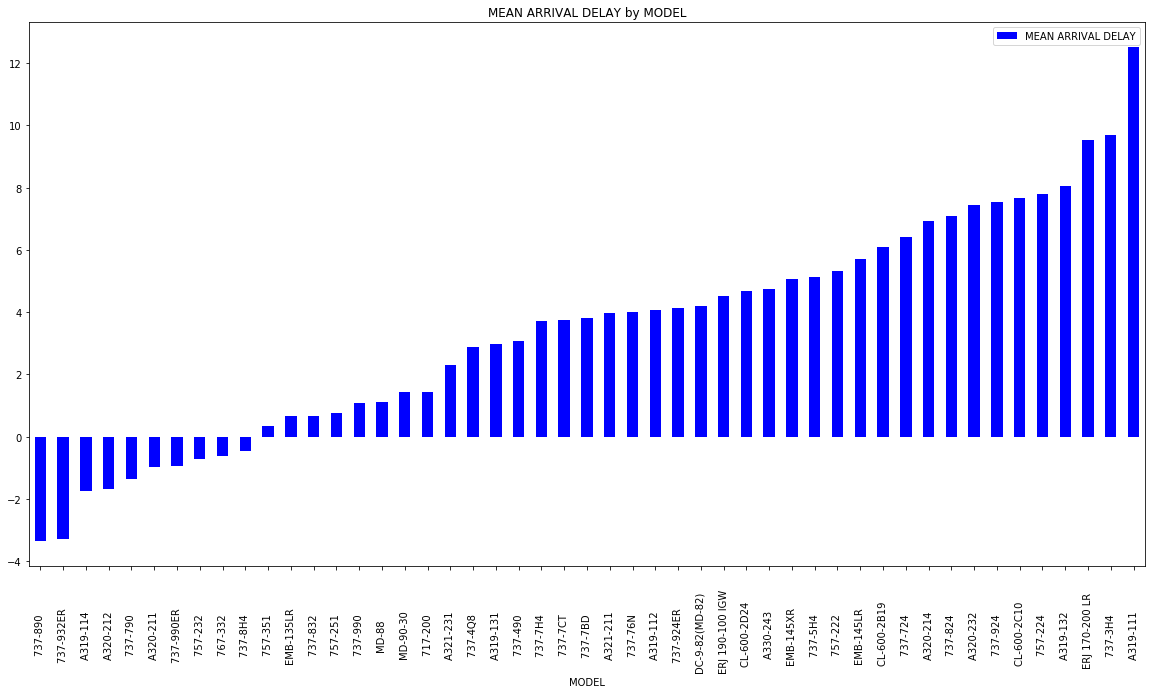

In [30]:
df = merge.copy(True)
df = df['MODEL']

display_mean_arrival_delay(merge,'MODEL','10000','MEAN ARRIVAL DELAY','MEAN ARRIVAL DELAY','blue')

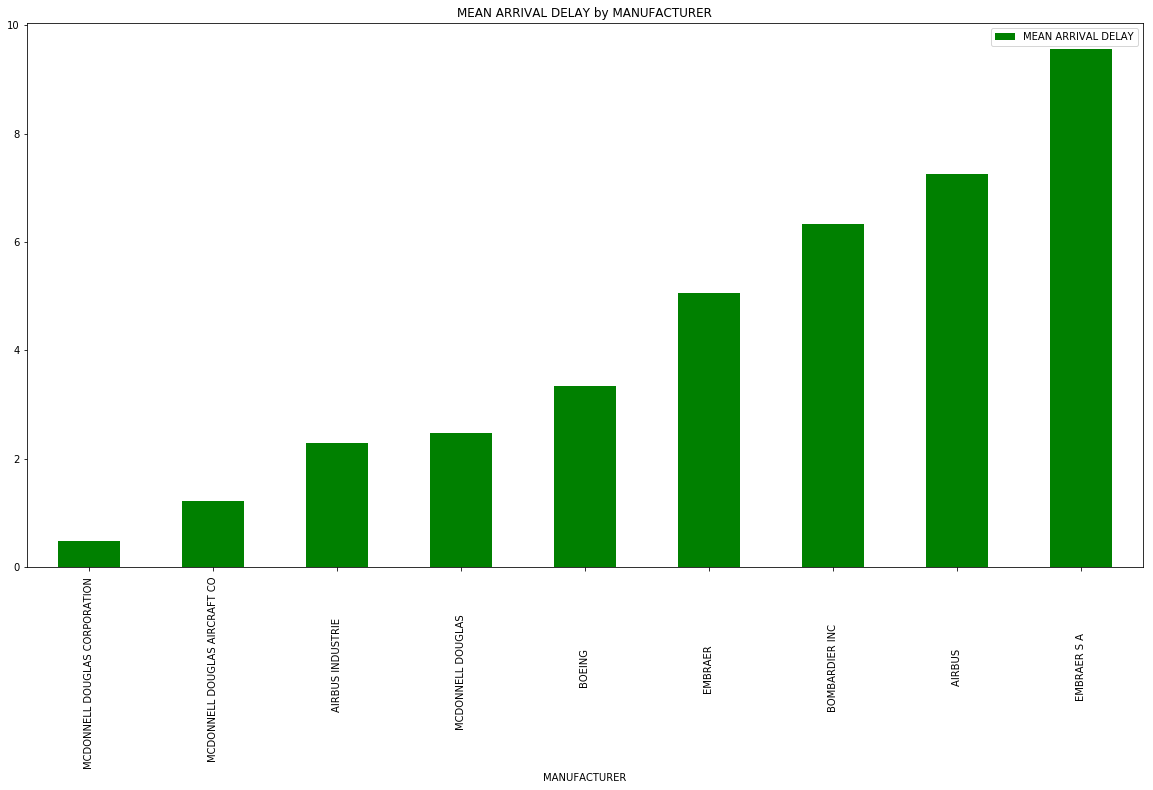

In [31]:
display_mean_arrival_delay(merge,'MANUFACTURER','10000','MEAN ARRIVAL DELAY','MEAN ARRIVAL DELAY','green')

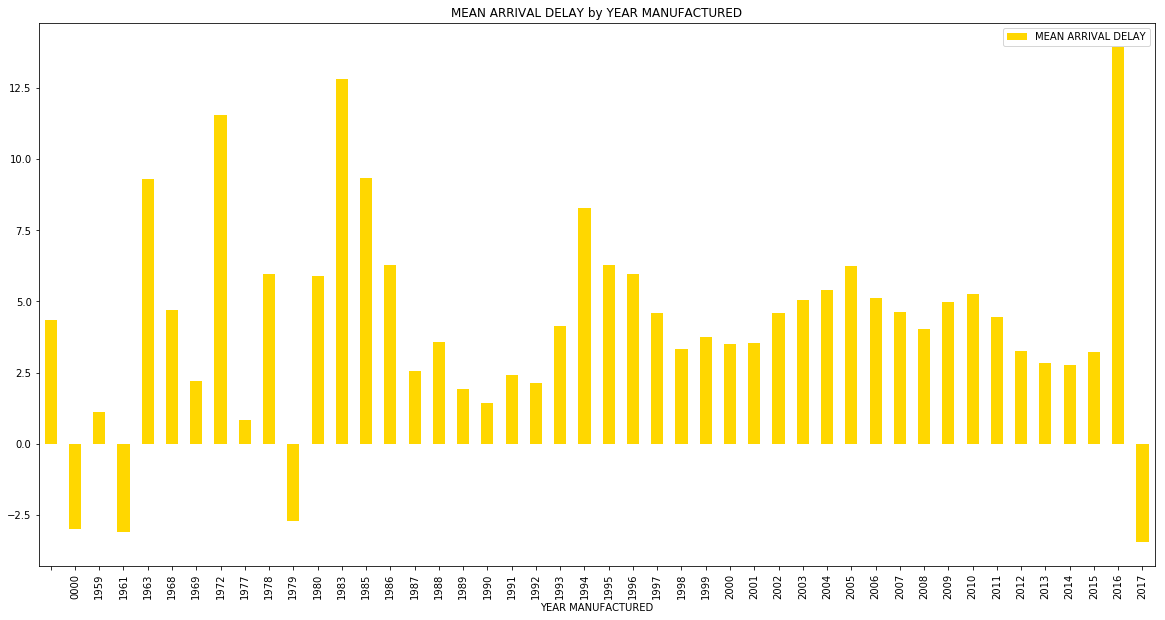

In [32]:
display_mean_arrival_delay(merge,'YEAR MANUFACTURED','0','MEAN ARRIVAL DELAY','YEAR MANUFACTURED','gold')

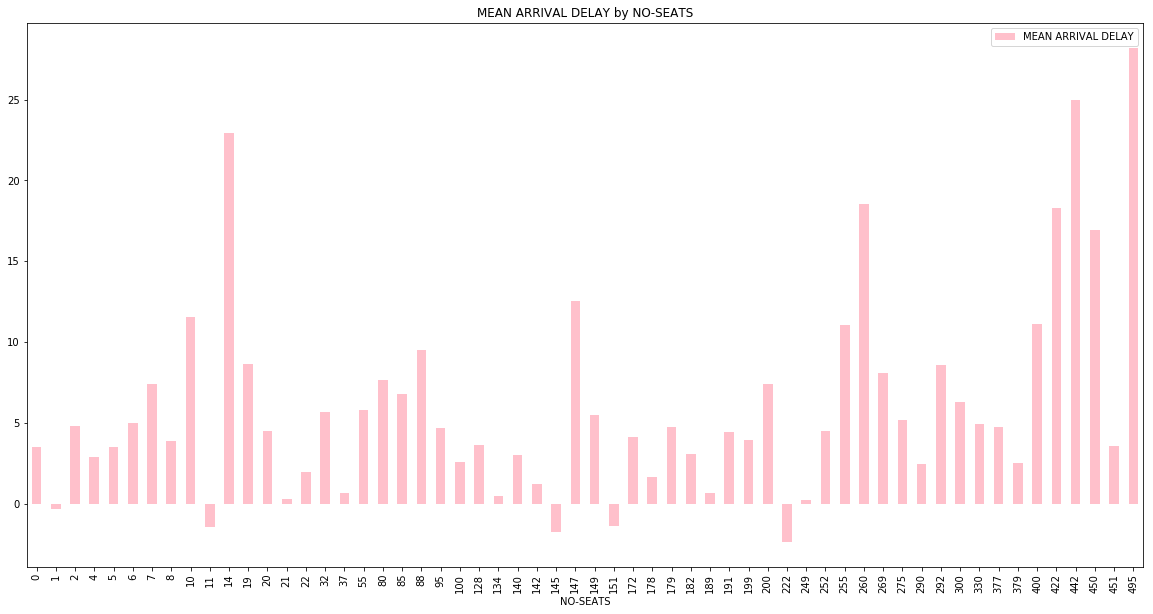

In [33]:
display_mean_arrival_delay(merge,'NO-SEATS','0','MEAN ARRIVAL DELAY', 'NO-SEATS','pink')

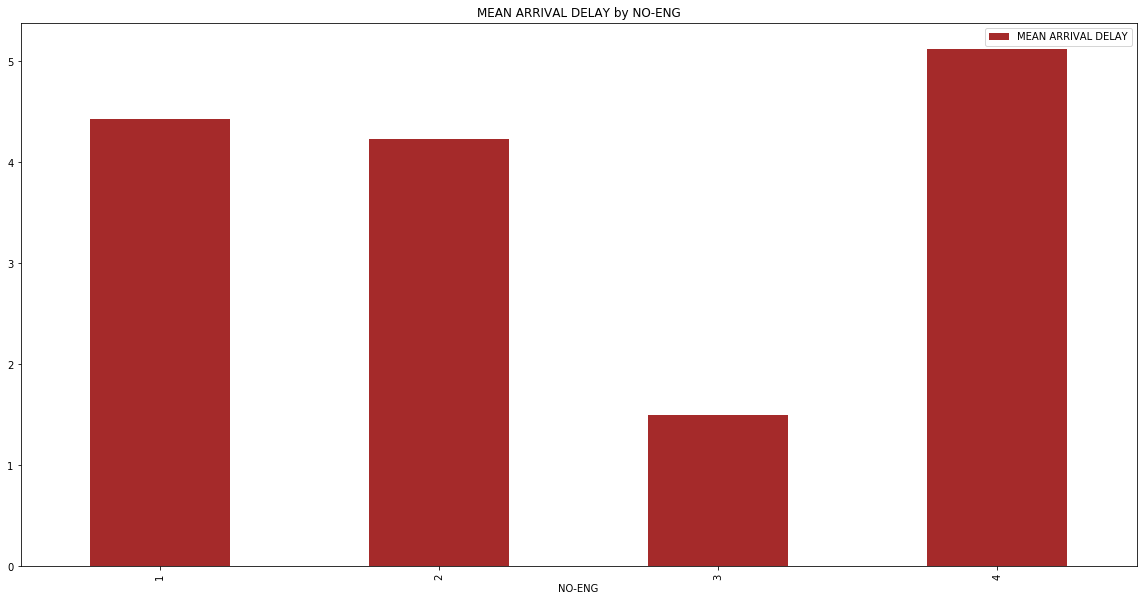

In [34]:
display_mean_arrival_delay(merge,'NO-ENG','0','MEAN ARRIVAL DELAY', 'NO-ENG','brown')